<a href="https://colab.research.google.com/github/ngzhiwei517/Machine_Learning_Self-Learn/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [239]:
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [240]:
dataset = pd.read_csv('./Melbourne_housing_FULL.csv')
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


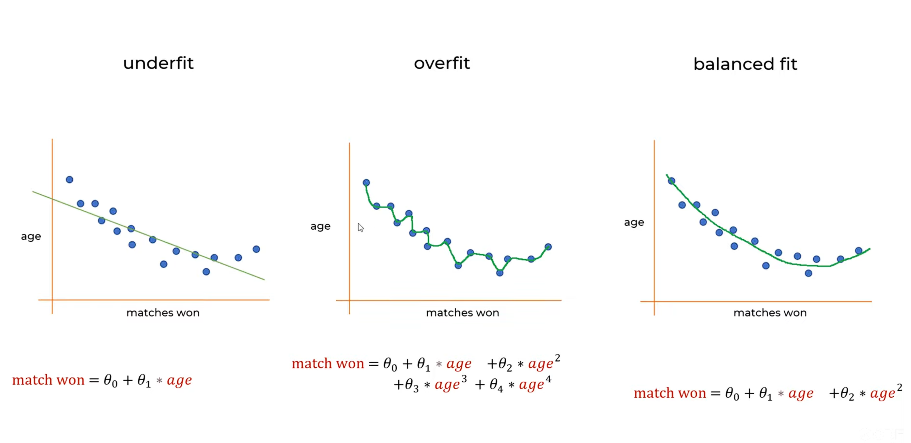

In [241]:
dataset.nunique()

,0
Suburb,351
Address,34009
Rooms,12
Type,3
Price,2871
Method,9
SellerG,388
Date,78
Distance,215
Postcode,211


In [242]:
dataset.shape

(34857, 21)

In [243]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount',
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]
dataset.shape

(34857, 15)

In [244]:
dataset.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,3
Distance,1
CouncilArea,3
Bedroom2,8217


In [245]:
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)
dataset.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,0
Distance,0
CouncilArea,3
Bedroom2,0


#### other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting

In [246]:
dataset['Landsize']=dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea']=dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())
dataset.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,0
Distance,0
CouncilArea,3
Bedroom2,0


In [247]:
dataset.dropna(inplace=True)
dataset.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,0
Propertycount,0
Distance,0
CouncilArea,0
Bedroom2,0


# Do One Hot Encoding

In [248]:
dataset

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.000000,160.2564,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.000000,79.0000,1035000.0
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.000000,150.0000,1465000.0
5,Abbotsford,3,h,PI,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,94.000000,160.2564,850000.0
6,Abbotsford,4,h,VB,Nelson,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,1.0,2.0,120.000000,142.0000,1600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,PI,Jas,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,4.0,1.0,3.0,593.000000,160.2564,1480000.0
34853,Yarraville,2,h,SP,Sweeney,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,2.0,2.0,1.0,98.000000,104.0000,888000.0
34854,Yarraville,2,t,S,Jas,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,2.0,1.0,2.0,220.000000,120.0000,705000.0
34855,Yarraville,3,h,SP,hockingstuart,Western Metropolitan,6543.0,6.3,Maribyrnong City Council,0.0,0.0,0.0,593.598993,160.2564,1140000.0


In [249]:
dummies=pd.get_dummies(dataset,dtype=int)
dummies


,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Abbotsford,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.000000,160.2564,1480000.0,1,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.000000,79.0000,1035000.0,1,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.000000,150.0000,1465000.0,1,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.000000,160.2564,850000.0,1,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.000000,142.0000,1600000.0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,6543.0,6.3,4.0,1.0,3.0,593.000000,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,0,0
34853,2,6543.0,6.3,2.0,2.0,1.0,98.000000,104.0000,888000.0,0,...,0,0,0,0,0,0,0,0,0,0
34854,2,6543.0,6.3,2.0,1.0,2.0,220.000000,120.0000,705000.0,0,...,0,0,0,0,0,0,0,0,0,0
34855,3,6543.0,6.3,0.0,0.0,0.0,593.598993,160.2564,1140000.0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
X=dummies.drop('Price',axis=1)
Y=dataset['Price']
Y

,Price
1,1480000.0
2,1035000.0
4,1465000.0
5,850000.0
6,1600000.0
...,...
34852,1480000.0
34853,888000.0
34854,705000.0
34855,1140000.0


In [251]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)


In [252]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [253]:
model.score(X_test,Y_test)

0.13871990247599242

In [254]:
model.score(X_train,Y_train)

0.6827792395792723

### Normal Regression is clearly overfitting the data, let's try other models

## Using Lasso (L1 Regularized) Regression Model

alpha = strength of L1 regularization

Larger alpha → stronger penalty
→ more coefficients shrink to exactly 0

Extreme cases

alpha = 0 → no regularization (linear regression)

Very large alpha → almost all coefficients = 0

👉 Controls feature selection

In [255]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [256]:
lasso_reg.score(X_test,Y_test)

0.6635678860824569

In [257]:
lasso_reg.score(X_train,Y_train)

0.6766917776418708

# L2 Ridge

In [258]:
ridge_reg=linear_model.Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(X_train,Y_train)
ridge_reg.score(X_train,Y_train)

0.6627818359147762

In [259]:
ridge_reg.score(X_test,Y_test)

0.6673612969137435

We see that Lasso and Ridge Regularizations prove to be beneficial when our Simple Linear Regression Model overfits



---



---



---
# Exercise



Create a simple dataset with polynomial features and split it into train/test sets.

In [281]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Create sample data with polynomial relationship
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X**2 + 3 * X + 5 + np.random.randn(100, 1) * 10


In [282]:
from sklearn import linear_model
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [283]:
linear_test=model.score(X_test,Y_test)
linear_test

0.9397805520858341

Check for overfitting: If training score >> test score, your model is overfitting!

Create a Lasso regression model with alpha=1.0 and compare its performance to LinearRegression.

In [291]:
lasso_model=linear_model.Lasso(alpha=0.1)
lasso_model.fit(X_train,Y_train)

Lasso(alpha=0.1)

In [292]:
lasso_test=lasso_model.score(X_test,Y_test)
lasso_test

0.939802519056651

In [293]:
print(f'Linear test score:{linear_test}')
print(f'Lasso test score:{lasso_test}')
print(f'Improvement over linear regression:{lasso_test-linear_test}')

Linear test score:0.9397805520858341
Lasso test score:0.939802519056651
Improvement over linear regression:2.1966970816911235e-05


In [284]:
ridge_reg=linear_model.Ridge(alpha=1)
ridge_reg.fit(X_train,Y_train)
ridge_reg.score(X_test,Y_test)

0.9398398194678591